In [324]:
#데이터 구성하기 -> 모델 생성 -> 최종모델선정/시각화 -> 결론도출

# 패키지불러오기

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

#회귀 decision tree
from sklearn.tree import DecisionTreeRegressor

#최적모델 파라미터 탐색

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#나무구조 시각화

from sklearn.tree import plot_tree

from lightgbm import LGBMClassifier


mpl.rc('font', family = 'Malgun Gothic')
mpl.rc('axes', unicode_minus = False)
import warnings
warnings.filterwarnings('ignore')

In [90]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import plotly.express as px
import missingno as msno


mpl.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)


#https://matplotlib.org/stable/gallery/color/named_colors.html
#색상표


In [10]:
df_diag = pd.read_csv('Patient_Diagnosis_Data.csv')

In [11]:
df_surgery = pd.read_csv('Patient_Surgery_Data.csv', encoding = 'utf-8')

In [12]:
df_image = pd.read_csv('Medical_Image_Data_01.csv', encoding = 'euc-kr')

In [15]:
df_diag

,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,말초동맥질환여부,...,입원일자,종양진행여부,직업,체중,퇴원일자,헤모글로빈수치,혈전합병증여부,환자통증정도,흡연여부,통증기간(월)
0,1PT,22.8,3,51.0,0.0,0,0,0,0,0,...,20190713,0,자영업,60.3,20190716,13.66,0,10,0,1.0
1,2PT,44.9,4,26.0,0.0,0,0,0,0,0,...,20190715,0,운동선수,71.7,20190716,13.73,0,10,0,1.0
2,3PT,53.0,3,NaN,0.0,0,0,1,0,0,...,20190729,0,특수전문직,77.1,20190801,15.34,0,7,0,1.0
3,4PT,54.7,4,18.0,0.0,0,1,0,0,0,...,20190731,0,주부,74.2,20190803,15.38,0,7,0,2.0
4,5PT,53.8,4,NaN,0.0,0,1,0,0,0,...,20190903,0,특수전문직,80.7,20190907,13.08,0,7,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,1890PT,44.0,1,NaN,0.0,0,0,0,0,0,...,20170407,1,무직,64.0,20170408,13.60,0,7,0,12.0
1890,1891PT,30.8,2,NaN,0.0,0,0,0,0,0,...,20170426,0,사무직,59.0,20170429,13.00,0,7,0,6.0
1891,1892PT,36.7,3,NaN,0.0,0,0,0,0,1,...,20170410,0,무직,70.0,20170412,14.40,0,7,0,1.0
1892,1893PT,32.5,2,NaN,0.0,0,0,0,0,0,...,20170408,0,사무직,77.0,20170411,15.00,0,7,0,24.0


In [16]:
df_surgery

,환자ID,수술기법,수술시간,수술실패여부,수술일자,신장,연령,입원일자,재발여부,체중,퇴원일자,헤모글로빈수치,환자통증정도,통증기간(월),혈액형
0,1PT,TELD,68.0,0,20190715,163,66,20190713,0,60.3,20190716,13.66,10,1.0,RH+A
1,2PT,TELD,31.0,0,20190716,171,47,20190715,0,71.7,20190716,13.73,10,1.0,RH+A
2,3PT,TELD,78.0,0,20190731,178,39,20190729,0,77.1,20190801,15.34,7,1.0,RH+B
3,4PT,TELD,73.0,0,20190802,174,40,20190731,0,74.2,20190803,15.38,7,2.0,RH+O
4,5PT,TELD,29.0,0,20190906,183,42,20190903,0,80.7,20190907,13.08,7,1.0,RH+A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,1890PT,NaN,80.0,0,20170407,157,59,20170407,0,64.0,20170408,13.60,7,12.0,RH+A
1890,1891PT,NaN,20.0,0,20170427,157,42,20170426,0,59.0,20170429,13.00,7,6.0,RH+B
1891,1892PT,IELD,50.0,0,20170411,167,61,20170410,0,70.0,20170412,14.40,7,1.0,RH+O
1892,1893PT,NaN,25.0,0,20170410,177,29,20170408,0,77.0,20170411,15.00,7,24.0,RH+A


In [17]:
df_image

,환자ID,전방디스크높이(mm),후방디스크높이(mm),지방축적도,Instability,MF + ES,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,1PT,16.1,12.3,282.3,0,1824.6,3,51.6,36.6,14.4,0,-1.01,2048.50,4,Down,0
1,2PT,13.7,6.4,177.3,0,1737.5,0,40.8,7.2,17.8,0,-1.14,1753.10,4,Up,0
2,3PT,13.6,7.4,256.8,0,1188.5,0,67.5,27.3,10.2,0,-1.77,1749.00,4,Down,0
3,4PT,10.6,7.3,250.1,0,2534.5,0,49.2,18.7,19.9,0,-1.58,1796.20,4,Down,0
4,5PT,17.1,8.1,232.2,0,1840.6,0,58.8,14.7,5.2,0,-0.79,2021.48,4,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,1890PT,17.0,10.7,237.5,0,2795.7,2,59.5,23.0,21.8,0,NaN,2652.20,5,Middle,0
1890,1891PT,9.4,8.2,288.0,0,1473.0,0,47.7,20.2,5.0,0,NaN,1795.80,4,Down,0
1891,1892PT,13.5,5.5,148.5,0,3864.1,0,44.6,15.0,17.4,1,NaN,2624.40,4,Down,0
1892,1893PT,14.0,10.0,89.0,0,2481.8,2,32.2,11.1,17.7,0,NaN,1972.50,5,Down,0


In [19]:
df_diag['수술실패여부'] = df_surgery['수술실패여부']

<AxesSubplot:xlabel='수술실패여부', ylabel='가족력'>

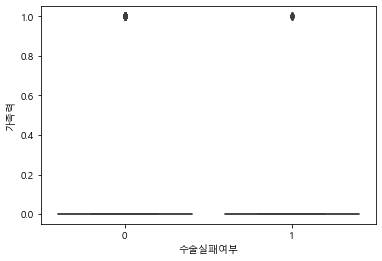

In [24]:
sns.boxplot(x = df_diag['수술실패여부'], y = df_diag[''])

<AxesSubplot:xlabel='수술실패여부', ylabel='연령'>

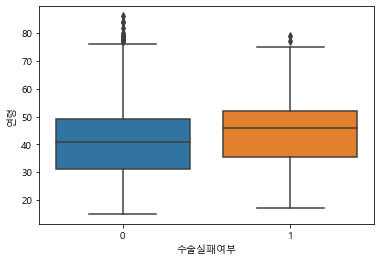

In [28]:
sns.boxplot(x = df_diag['수술실패여부'], y = df_diag['연령'])

In [32]:
df_diag.pivot_table(index = '수술실패여부',columns = '직업', values = '환자ID', aggfunc = 'count')

직업,건설업,공무원,교사,군인,노동직,농업,무직,사무직,사업가,예술가,운동선수,운수업,의료직,자영업,주부,특수전문직,학생
수술실패여부,,,,,,,,,,,,,,,,,
0,16.0,47.0,29.0,86.0,40.0,38.0,154.0,424.0,38.0,9.0,14.0,44.0,39.0,154.0,111.0,21.0,131.0
1,1.0,4.0,1.0,4.0,2.0,2.0,10.0,25.0,1.0,1.0,NaN,6.0,1.0,17.0,3.0,2.0,4.0


In [33]:
df_diag['BMI'] = df_diag['체중'] / ((df_diag['신장']*0.01)**2)

<AxesSubplot:xlabel='수술실패여부', ylabel='BMI'>

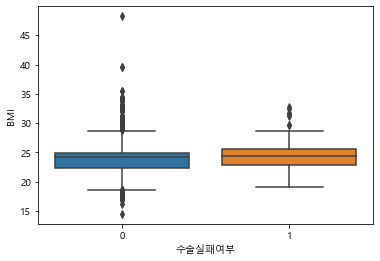

In [34]:
sns.boxplot(x = df_diag['수술실패여부'], y = df_diag['BMI'])

In [38]:
df_diag['과거수술횟수'].unique()

array([0, 1, 2, 3], dtype=int64)

In [39]:
df_diag.pivot_table(index = '수술실패여부',columns = '과거수술횟수', values = '환자ID', aggfunc = 'count')

과거수술횟수,0,1,2,3
수술실패여부,,,,
0,1410,216,147,6
1,89,9,15,2


<AxesSubplot:>

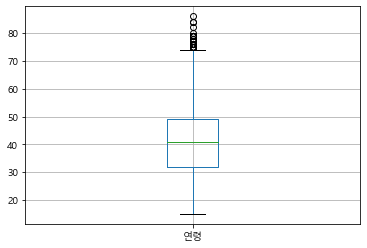

In [42]:
df_diag[['연령']].boxplot()

In [44]:
df_diag['연령'].mean()

41.463569165786694

In [58]:
df_surgery['수술년월'] = df_surgery['수술일자'].astype(str).str[0:6]

In [59]:
df_surgery['수술년월']

0       201907
1       201907
2       201907
3       201908
4       201909
         ...  
1889    201704
1890    201704
1891    201704
1892    201704
1893    201704
Name: 수술년월, Length: 1894, dtype: object

In [61]:
df_surgery2 = df_surgery.sort_values(by='수술년월')

In [63]:
df_surgery2.pivot_table(index = '수술년월',values = '환자ID',aggfunc='count')

,환자ID
수술년월,
200901,2
200903,2
200904,25
200905,26
200906,19
...,...
202004,13
202005,17
202006,27


<AxesSubplot:>

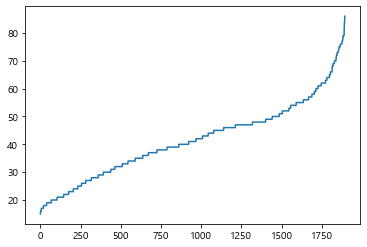

In [76]:
df_diag['연령'].sort_values().reset_index()['연령'].plot()

In [78]:
(df_diag['헤모글로빈수치'] - df_surgery['헤모글로빈수치']).sum()

0.0

In [79]:
(df_diag['환자통증정도'] - df_surgery['환자통증정도']).sum()

0

In [83]:
df2 = df_diag.merge(df_surgery, on = '환자ID')

In [85]:
df3 = df2.merge(df_image, on = '환자ID')

In [89]:
df3[df3['PI'].isnull()]

,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,말초동맥질환여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
446,447PT,0.0,1,NaN,0.0,0,0,1,0,0,...,0,NaN,NaN,14.8,0,-1.43,1830.00,4,Middle,0
916,917PT,0.0,1,NaN,0.0,0,0,0,0,0,...,0,NaN,NaN,14.8,0,-0.81,1830.00,4,Middle,0
1477,1478PT,33.6,1,NaN,0.0,0,0,0,0,0,...,1,NaN,NaN,12.6,0,NaN,1569.22,5,Middle,0
1837,1838PT,0.0,1,NaN,0.0,0,0,0,0,0,...,0,NaN,NaN,14.8,0,NaN,1830.00,5,Middle,0


<AxesSubplot:>

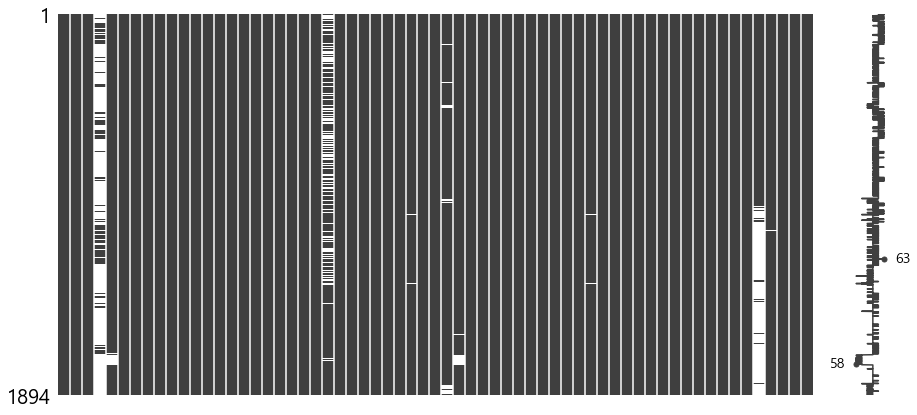

In [91]:
msno.matrix(df3, figsize=(15,7))

In [96]:
df3.isnull().sum()

환자ID                         0
Large Lymphocyte             0
Location of herniation       0
ODI                       1432
가족력                         51
                          ... 
골밀도                        896
디스크단면적                       1
디스크위치                        0
척추이동척도                       0
척추전방위증                       0
Length: 63, dtype: int64

In [103]:
df3.dropna(thresh=2)

,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,말초동맥질환여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,1PT,22.8,3,51.0,0.0,0,0,0,0,0,...,3,51.6,36.6,14.4,0,-1.01,2048.50,4,Down,0
1,2PT,44.9,4,26.0,0.0,0,0,0,0,0,...,0,40.8,7.2,17.8,0,-1.14,1753.10,4,Up,0
2,3PT,53.0,3,NaN,0.0,0,0,1,0,0,...,0,67.5,27.3,10.2,0,-1.77,1749.00,4,Down,0
3,4PT,54.7,4,18.0,0.0,0,1,0,0,0,...,0,49.2,18.7,19.9,0,-1.58,1796.20,4,Down,0
4,5PT,53.8,4,NaN,0.0,0,1,0,0,0,...,0,58.8,14.7,5.2,0,-0.79,2021.48,4,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,1890PT,44.0,1,NaN,0.0,0,0,0,0,0,...,2,59.5,23.0,21.8,0,NaN,2652.20,5,Middle,0
1890,1891PT,30.8,2,NaN,0.0,0,0,0,0,0,...,0,47.7,20.2,5.0,0,NaN,1795.80,4,Down,0
1891,1892PT,36.7,3,NaN,0.0,0,0,0,0,1,...,0,44.6,15.0,17.4,1,NaN,2624.40,4,Down,0
1892,1893PT,32.5,2,NaN,0.0,0,0,0,0,0,...,2,32.2,11.1,17.7,0,NaN,1972.50,5,Down,0


In [113]:
df3 = df_image.merge(df_surgery, on = '환자ID')[['골밀도','수술실패여부']]

In [114]:
df3

,골밀도,수술실패여부
0,-1.01,0
1,-1.14,0
2,-1.77,0
3,-1.58,0
4,-0.79,0
...,...,...
1889,NaN,0
1890,NaN,0
1891,NaN,0
1892,NaN,0


In [122]:
df3['수술실패여부'].value_counts()

0    1779
1     115
Name: 수술실패여부, dtype: int64

In [123]:
df3.dropna()['수술실패여부'].value_counts()

0    938
1     60
Name: 수술실패여부, dtype: int64

In [126]:
df_image['전방디스크높이(mm)'] - df_image['후방디스크높이(mm)'] < 0

0       False
1       False
2       False
3       False
4       False
        ...  
1889    False
1890    False
1891    False
1892    False
1893    False
Length: 1894, dtype: bool

In [131]:
import datetime

df_surgery['수술일자(dt)'] = pd.to_datetime(df_surgery['수술일자'], format = '%Y%m%d')

In [133]:
df_surgery['수술월']=df_surgery['수술일자(dt)'].dt.month

In [135]:

def func(x):
    if x>=12:
        return '겨울'
    elif x>=9:
        return '가을'
    elif x>=6:
        return '여름'
    elif x>=3:
        return '봄'
    else:
        return '겨울'


df_surgery['수술월'].apply(func)

0       여름
1       여름
2       여름
3       여름
4       가을
        ..
1889     봄
1890     봄
1891     봄
1892     봄
1893     봄
Name: 수술월, Length: 1894, dtype: object

# 모델 만들기

In [137]:
df = pd.read_csv('df_all.csv')

In [140]:
df['수술일자'] = pd.to_datetime(df['수술일자'], format = '%Y%m%d')

In [141]:
df['수술월']= df['수술일자'].dt.month

In [144]:
df['입원일자'] = pd.to_datetime(df['입원일자'], format = '%Y%m%d')
df['입원월']= df['입원일자'].dt.month

def func(x):
    if x>=12:
        return '겨울'
    elif x>=9:
        return '가을'
    elif x>=6:
        return '여름'
    elif x>=3:
        return '봄'
    else:
        return '겨울'

df['입원계절'] = df['입원월'].apply(func)

In [145]:
def func(x):
    if x>=12:
        return '겨울'
    elif x>=9:
        return '가을'
    elif x>=6:
        return '여름'
    elif x>=3:
        return '봄'
    else:
        return '겨울'

df['수술계절'] = df['수술월'].apply(func)

In [148]:
df[df['입원계절'] != df['수술계절']]

,환자ID,Large Lymphocyte,Location of herniation,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,말초동맥질환여부,빈혈여부,...,척추이동척도,척추전방위증,연령대,BMI,디스크높이차(mm),비만정도,수술월,입원월,입원계절,수술계절
36,37PT,25.2,3,0.0,0,0,0,0,0,0,...,Middle,0,70대,23.611506,6.50,과체중,3,2,겨울,봄
87,88PT,41.9,3,1.0,0,1,2,1,0,0,...,Middle,0,40대,25.567649,5.00,경도비만,3,2,겨울,봄
310,312PT,34.5,1,0.0,0,0,0,0,0,0,...,Middle,0,40대,22.318188,2.00,정상,6,5,봄,여름
311,313PT,1.4,2,0.0,0,0,0,0,0,0,...,Middle,0,20대,24.239364,0.70,과체중,6,5,봄,여름
386,388PT,34.0,1,0.0,0,0,0,0,0,0,...,Middle,0,30대,22.824265,1.83,정상,9,8,여름,가을
387,389PT,44.8,1,0.0,0,0,0,0,0,0,...,Middle,0,30대,22.531231,5.20,정상,9,8,여름,가을
471,474PT,54.7,4,0.0,0,0,1,1,0,0,...,Down,0,40대,23.874096,3.30,과체중,3,2,겨울,봄
472,475PT,53.8,4,0.0,0,0,0,0,0,0,...,Up,0,30대,21.613488,9.00,정상,3,2,겨울,봄
473,476PT,28.5,3,0.0,0,0,0,0,0,0,...,Down,0,40대,24.437440,2.10,과체중,3,2,겨울,봄
474,477PT,4.2,3,0.0,0,0,0,0,0,0,...,Down,0,20대,23.070098,3.80,과체중,3,2,겨울,봄


In [150]:
df.columns

Index(['환자ID', 'Large Lymphocyte', 'Location of herniation', '가족력', '간질성폐질환',
       '고혈압여부', '과거수술횟수', '당뇨여부', '말초동맥질환여부', '빈혈여부', '성별', '스테로이드치료', '신부전여부',
       '신장', '심혈관질환', '암발병여부', '연령', '우울증여부', '입원기간', '입원일자', '종양진행여부', '직업',
       '체중', '퇴원일자', '헤모글로빈수치', '혈전합병증여부', '환자통증정도', '흡연여부', '통증기간(월)', '수술기법',
       '수술시간', '수술실패여부', '수술일자', '재발여부', '혈액형', '전방디스크높이(mm)', '후방디스크높이(mm)',
       '지방축적도', 'Instability', 'MF + ES', 'Modic change', 'PI', 'PT',
       'Seg Angle(raw)', 'Vaccum disc', '디스크단면적', '디스크위치', '척추이동척도', '척추전방위증',
       '연령대', 'BMI', '디스크높이차(mm)', '비만정도', '수술월', '입원월', '입원계절', '수술계절'],
      dtype='object')

In [158]:
df['디스크위치'].unique()

array([4, 5, 3, 2, 1], dtype=int64)

In [157]:
df['디스크위치'] = df['디스크위치'].replace({45 : 5, 12 : 2, 34 : 4, 23 : 3, 11 : 1 ,10 : 1 , 35 : 4})

In [199]:
df['수술실패여부'].value_counts()

0    1771
1     114
Name: 수술실패여부, dtype: int64

In [321]:
df2 = df[['과거수술횟수','연령', '종양진행여부', '직업', '흡연여부', '통증기간(월)',
       '수술시간', '전방디스크높이(mm)', '후방디스크높이(mm)',
       '지방축적도', 'Instability', 'MF + ES','PI', 'PT',
       'Seg Angle(raw)', 'Vaccum disc', '디스크단면적', '디스크위치', '척추이동척도', '척추전방위증',
        'BMI', '디스크높이차(mm)','수술계절', '수술실패여부']]


df2 = pd.get_dummies(df2)

In [325]:
df_x = df2.drop('수술실패여부', axis =1)
df_y = df2['수술실패여부']

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size = 0.3, random_state=1234)

print('학습용 X 데이터의 크기:', df_train_x.shape)
print('평가용 X 데이터의 크기:', df_test_x.shape)
print('학습용 Y 데이터의 크기:', df_train_y.shape)
print('평가용 Y 데이터의 크기:', df_test_y.shape)

#모델 생성

lgbm_uncustomized = LGBMClassifier(n_estimators=1000,random_state=1234)
lgbm_uncustomized.fit(df_train_x, df_train_y)


#데이터 설명력

print('학습용 데이터의 설명력 : {:.3f}'.format(tree_uncustomized.score(df_train_x, df_train_y)))
print('평가용 데이터의 설명력 : {:.3f}'.format(tree_uncustomized.score(df_test_x, df_test_y)))

학습용 X 데이터의 크기: (1319, 46)
평가용 X 데이터의 크기: (566, 46)
학습용 Y 데이터의 크기: (1319,)
평가용 Y 데이터의 크기: (566,)
학습용 데이터의 설명력 : 0.474
평가용 데이터의 설명력 : 0.002


In [323]:
df_train_y.sum()

75

In [305]:
df_test_y.sum()

39

In [338]:
from imblearn.over_sampling import SMOTE 

In [339]:
sampler = SMOTE()
sampler.fit(df_x, df_y)

SMOTE()

In [341]:
df_x_over, df_y_over = sampler.fit_resample(df_x, df_y)

In [342]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x_over, df_y_over, test_size = 0.3, random_state=1234)

In [343]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [344]:
pipe_list = [('pca',PCA()),('model',RandomForestClassifier())]
model_pipe = Pipeline(pipe_list)

In [345]:
hyper_parameter = {'model__max_depth':range(5,10),
                  'model__n_estimators':[50,100,150],
                  'model__class_weight':['balanced'],
                  'model__min_samples_split':range(5,10)} 

grid_model = GridSearchCV(model_pipe, param_grid=hyper_parameter, cv=3, n_jobs=-1, scoring='f1')
grid_model.fit(df_train_x, df_train_y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('model', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'model__class_weight': ['balanced'],
                         'model__max_depth': range(5, 10),
                         'model__min_samples_split': range(5, 10),
                         'model__n_estimators': [50, 100, 150]},
             scoring='f1')

In [346]:
best_model = grid_model.best_estimator_
best_model

Pipeline(steps=[('pca', PCA()),
                ('model',
                 RandomForestClassifier(class_weight='balanced', max_depth=9,
                                        min_samples_split=5))])

In [347]:
df_train_y_pred = best_model.predict(df_train_x)
df_test_y_pred = best_model.predict(df_test_x)

In [348]:
print(classification_report(df_train_y, df_train_y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1251
           1       1.00      0.95      0.97      1228

    accuracy                           0.97      2479
   macro avg       0.97      0.97      0.97      2479
weighted avg       0.97      0.97      0.97      2479



In [349]:
print(classification_report(df_test_y, df_test_y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       520
           1       1.00      0.93      0.97       543

    accuracy                           0.97      1063
   macro avg       0.97      0.97      0.97      1063
weighted avg       0.97      0.97      0.97      1063

